# Classifying Movie Reviews

### Imports and Data Collection


In [48]:
# imports
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

In [49]:
# data
num_words = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
word_index = imdb.get_word_index()
ind_to_word = {index: word for (word, index) in word_index.items()}

def vectorize_sequences(sequences, dimensions=num_words):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diff

In [50]:
# process data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Generate Model

In [114]:
# define model
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [115]:
# split training data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [116]:
# train the model
history = model.fit(partial_x_train, partial_y_train, batch_size=512,
          epochs=9, validation_data=(x_val, y_val))

Epoch 1/9
30/30 [==============================] - 1s 23ms/step - loss: 0.5616 - accuracy: 0.7811 - val_loss: 0.4909 - val_accuracy: 0.8123
Epoch 2/9
30/30 [==============================] - 0s 14ms/step - loss: 0.4172 - accuracy: 0.8767 - val_loss: 0.3998 - val_accuracy: 0.8665

In [117]:
# evaluating the model
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


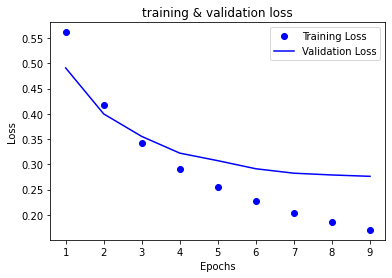

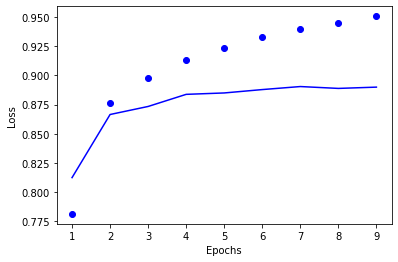

782/782 [==============================] - 1s 1ms/step - loss: 0.2914 - accuracy: 0.8837

In [118]:
loss_vals = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss_vals) + 1)
plt.plot(epochs, loss_vals, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("training & validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
train_acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, train_acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

print(model.evaluate(x_test, y_test))

In [120]:
model(x_test)


<tf.Tensor: shape=(25000, 1), dtype=float32, numpy=
array([[0.32765496],
       [0.99928355],
       [0.947147  ],
       ...,
       [0.12534997],
       [0.23305511],
       [0.5529617 ]], dtype=float32)>